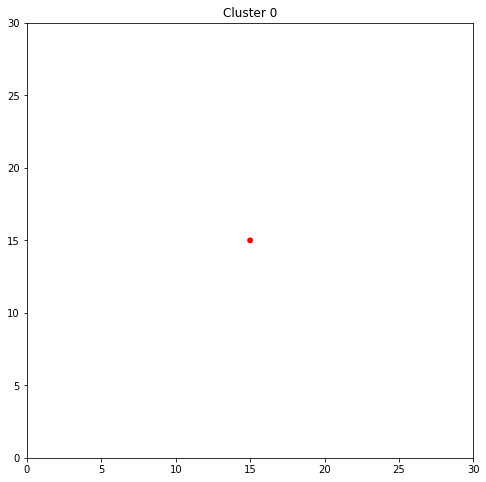

1


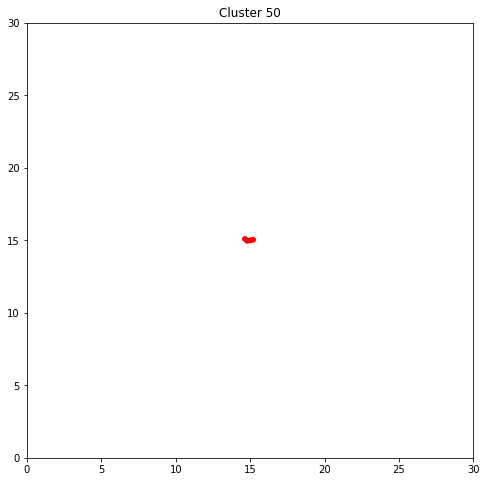

4


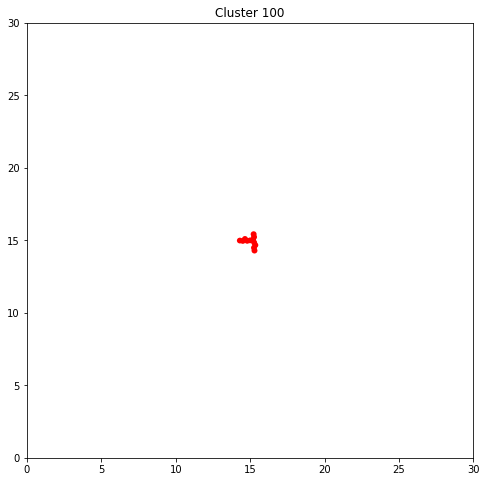

12


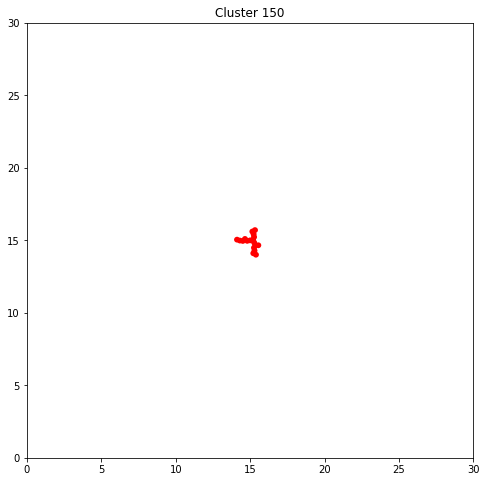

18


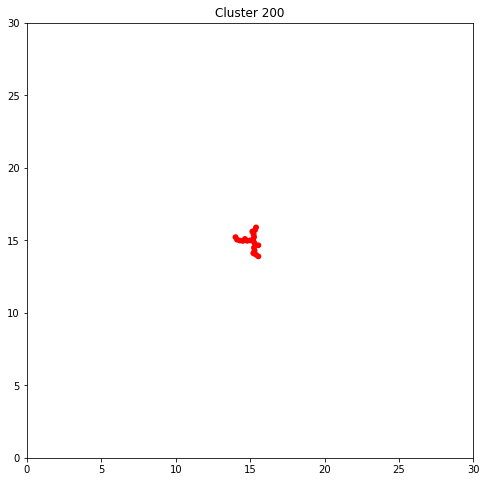

21


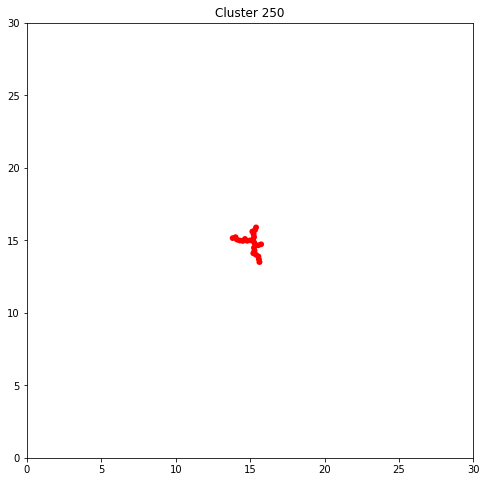

25


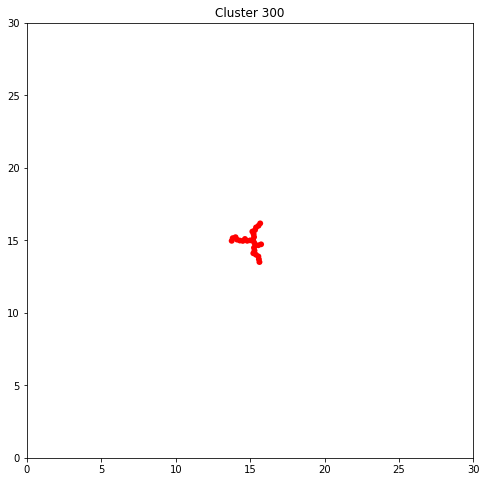

28


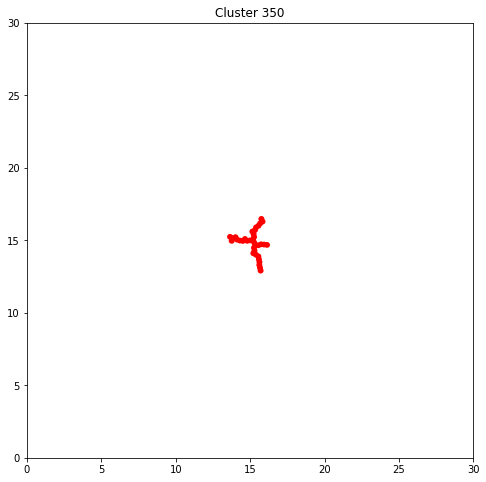

36


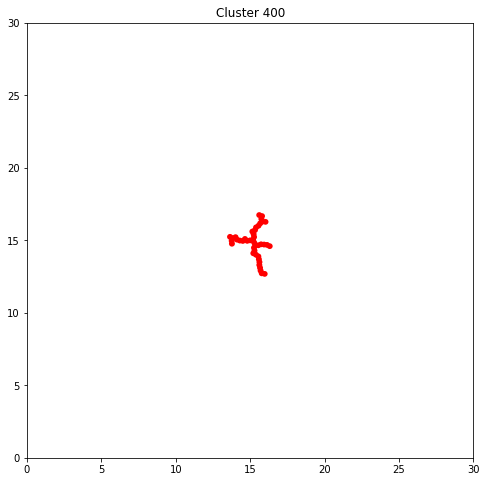

43


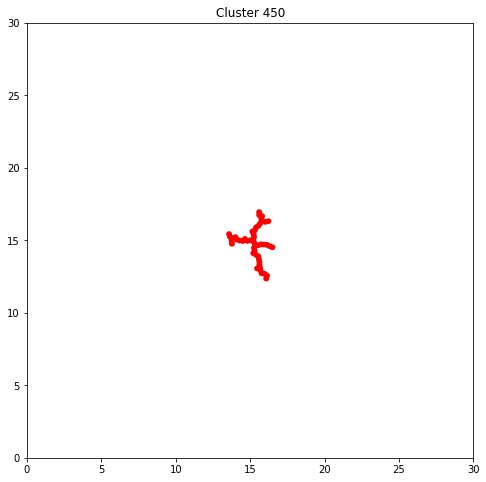

50


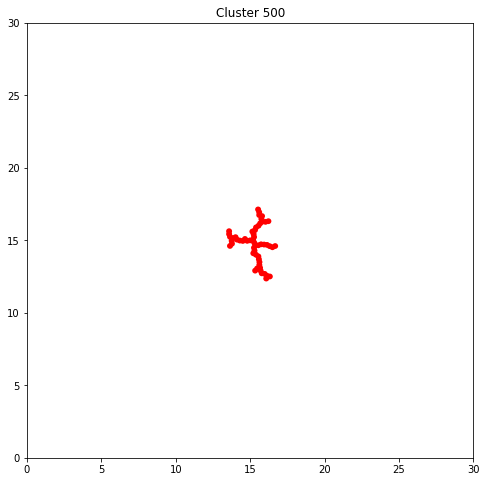

56


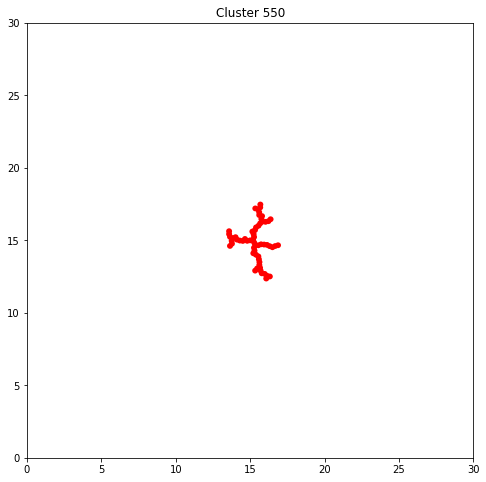

61


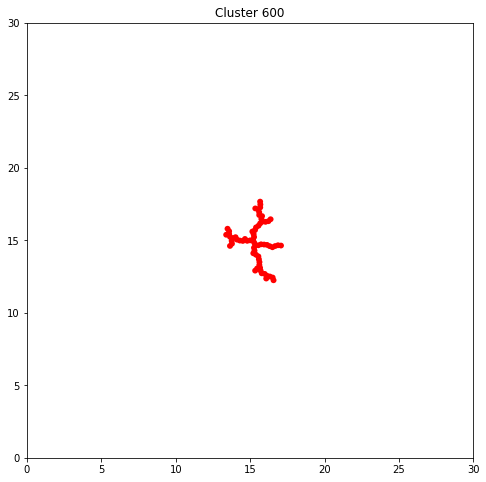

67


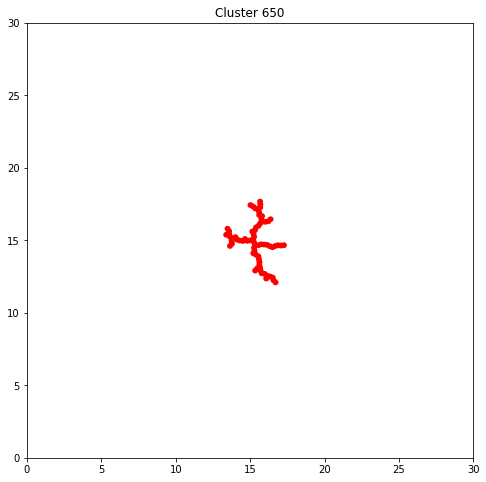

71


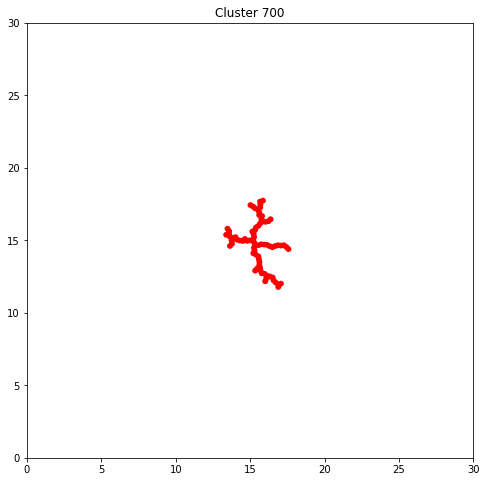

78


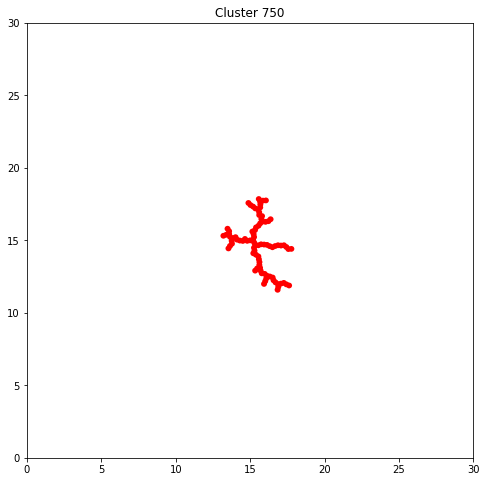

89


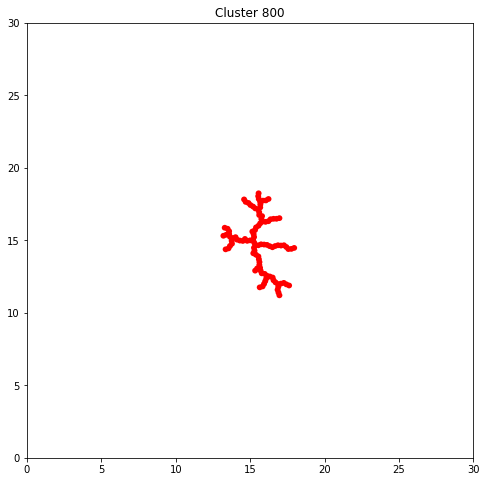

104


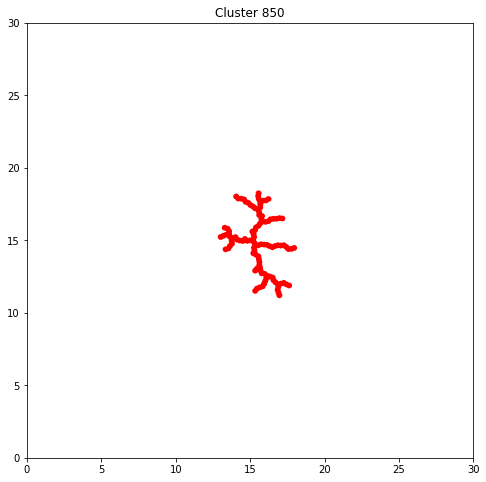

111


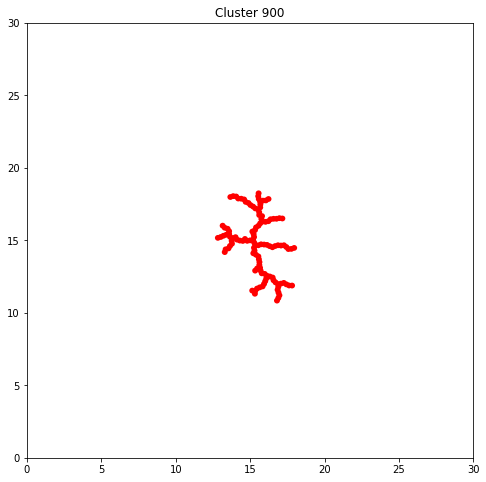

121


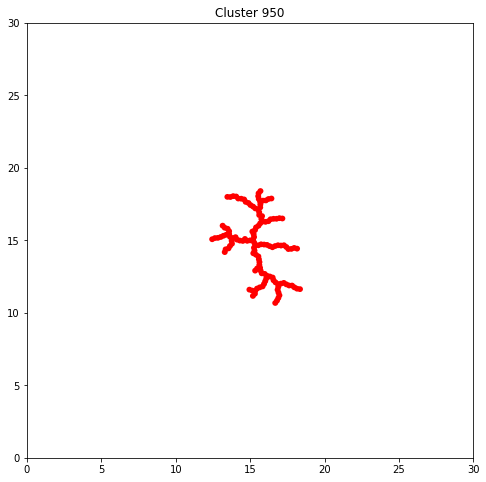

133


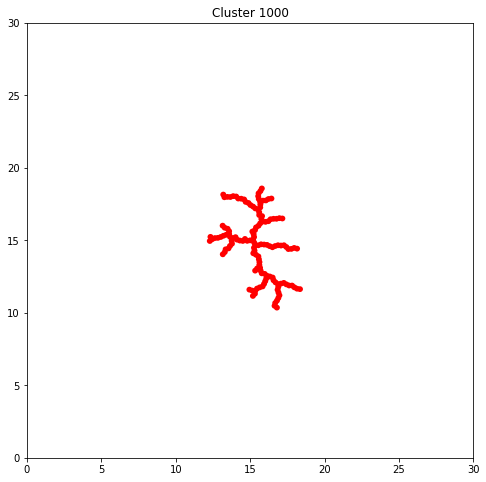

141


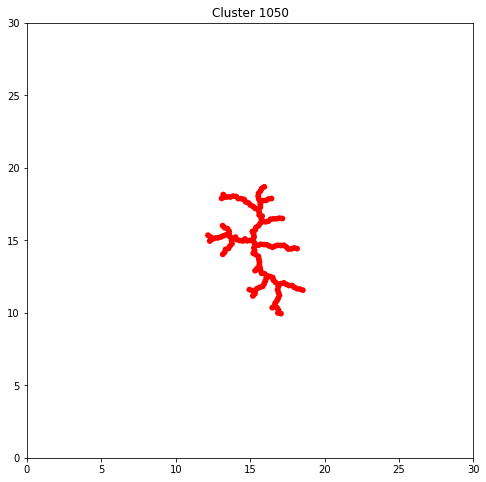

149


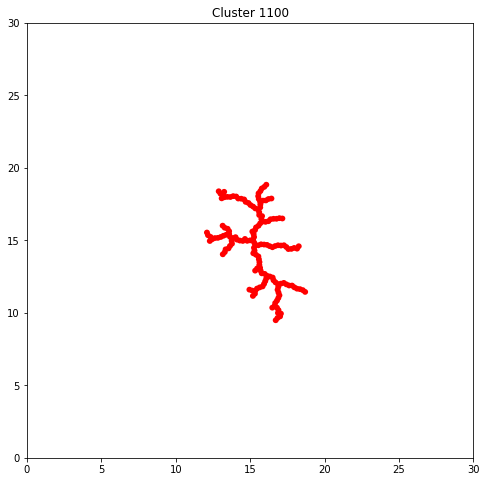

159


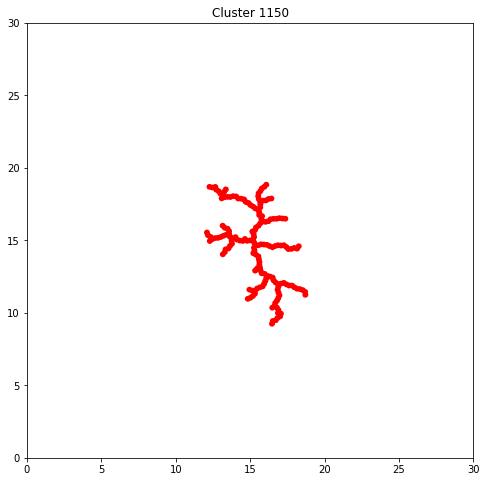

170


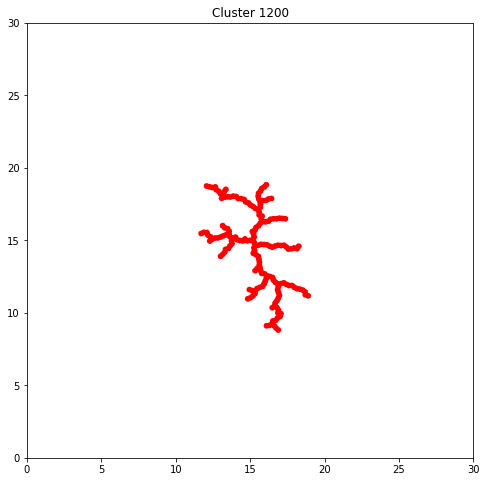

180


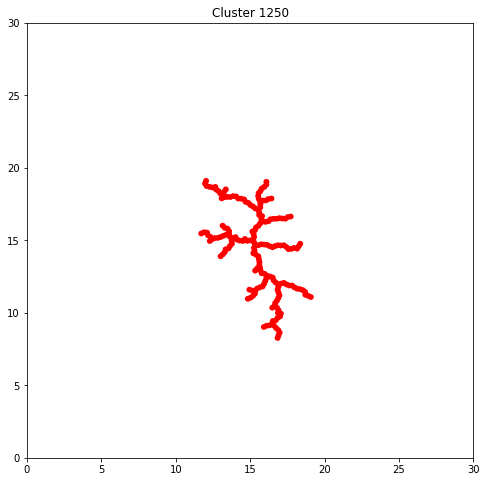

191


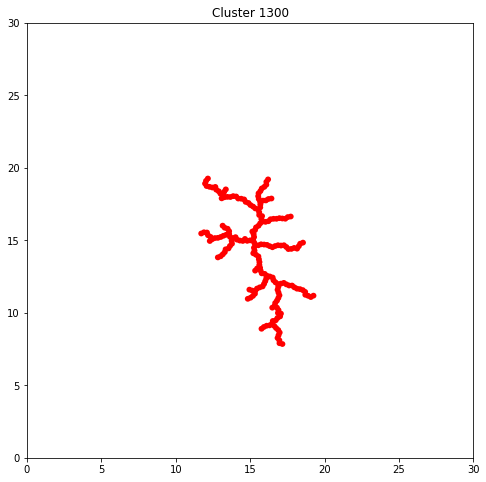

200


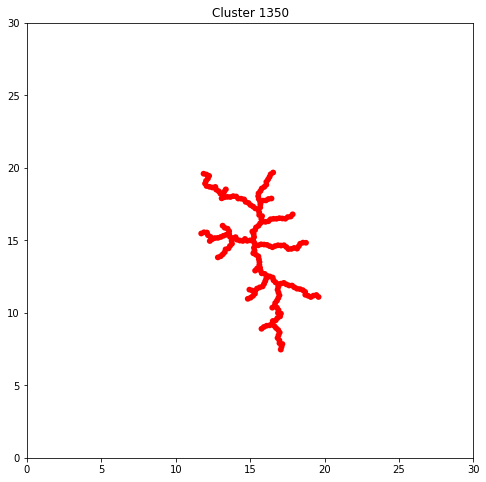

212


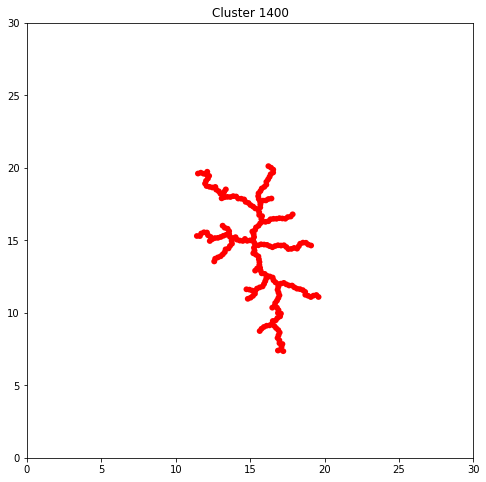

228


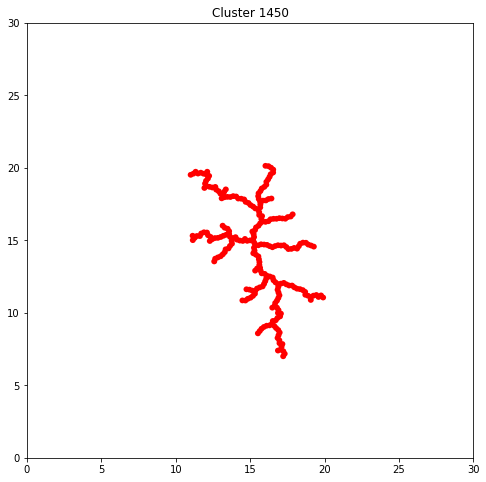

245


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

lambda_1 = 2 #odległoć przy której cząstki skleją się/agregują
L = 30 #rozmiar pudełka
R = 10 #odległoć od srodka, w ktorej pojawiaja sie czastki

class particles:
    def __init__(self, pos):
        self.pos = pos
        self.rad = 0.2
        self.rad_int = lambda_1      #rad i rad_int nie muszą tu być, skoro są ciągle takie same ale cząstki mogą mieć np. różny rozmiar 
    
lista = []
pos_0 = np.array([L//2, L//2])
lista.append(particles(pos_0))

start_lista = []
#definiujemy "lecącą" cząstkę (ballistic approach)
for i in range(1500):
    fi = np.random.uniform(0,2*np.pi, 1)  #wybieramy kąt pod którym pojawi się cząstka
    start_pos = np.zeros(2)
    start_pos[0] = L//2 + np.cos(fi)*R
    start_pos[1] = L//2 + np.sin(fi)*R
    
    direction = np.random.uniform(-1,1,2)        #nadajemy kierunek ruchu tak, by długosc wektora to 0.1
    start_lista.append(start_pos)

    g = 0       
    for j in range(int(L)):               #jak dlugo czastka sie porusza
        while g==0:    
            start_pos = start_pos + direction
            if start_pos[0]>=L or start_pos[0]<=0 or start_pos[1]>=L or start_pos[1]<=0:
                g =2
            else:
                neighbors = []
                d_list =[]
                for p in lista:
                    d = np.linalg.norm(p.pos-start_pos)
                    if d <= lambda_1:
                        neighbors.append(p.pos)
                        d_list.append(d)
                if len(d_list) > 0:
                    b = d_list.index(min(d_list))
                    neigh_pos = neighbors[b]
                    dx = start_pos[0] - neigh_pos[0]
                    dy = start_pos[1] - neigh_pos[1]
                    teta = np.arctan(dy/dx)
                    pos = np.zeros(2)
                    pos[0] = neigh_pos[0] + 2*0.1*dx/np.sqrt(dx**2+dy**2)
                    pos[1] = neigh_pos[1] + 2*0.1*dy/np.sqrt(dx**2+dy**2)
                    lista.append(particles(pos))
                    g = 2
    
   
    if i%50==0:   
        plt.clf() #czyszczenie obrazka
        G = plt.gcf() #zrób nowy obrazek
        for p in lista:
            a = plt.gca() #definiujemy osie
            circle = Circle((p.pos[0],p.pos[1]), radius = p.rad, fc = 'red')
            a.add_patch(circle) #do obrazka a dodajemy kółko
      #  for s in start_lista:
       #     a = plt.gca() #definiujemy osie
        #    circle = Circle((s[0],s[1]), radius = 0.1, fc = 'blue')
         #   a.add_patch(circle)
        a.set_xlim(0, L) #zakres osi x
        a.set_ylim(0, L) #zakres osi y
        G.set_size_inches((8,8)) #wybieramy rozmiar rysunku
        plt.title('Cluster '+str(i) +'lambda = '+str(lambda_1))
        plt.show()
        print(len(lista))
